[View in Colaboratory](https://colab.research.google.com/github/Naren-Jegan/CNN-Keras-/blob/master/CNN.ipynb)

In [1]:
# Install a Drive FUSE wrapper.
# https://github.com/astrada/google-drive-ocamlfuse
!apt-get update -qq 2>&1 > /dev/null
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse

Preconfiguring packages ...
Selecting previously unselected package cron.
(Reading database ... 18396 files and directories currently installed.)
Preparing to unpack .../00-cron_3.0pl1-128ubuntu5_amd64.deb ...
Unpacking cron (3.0pl1-128ubuntu5) ...
Selecting previously unselected package libapparmor1:amd64.
Preparing to unpack .../01-libapparmor1_2.11.0-2ubuntu17.1_amd64.deb ...
Unpacking libapparmor1:amd64 (2.11.0-2ubuntu17.1) ...
Selecting previously unselected package libdbus-1-3:amd64.
Preparing to unpack .../02-libdbus-1-3_1.10.22-1ubuntu1_amd64.deb ...
Unpacking libdbus-1-3:amd64 (1.10.22-1ubuntu1) ...
Selecting previously unselected package dbus.
Preparing to unpack .../03-dbus_1.10.22-1ubuntu1_amd64.deb ...
Unpacking dbus (1.10.22-1ubuntu1) ...
Selecting previously unselected package dirmngr.
Preparing to unpack .../04-dirmngr_2.1.15-1ubuntu8.1_amd64.deb ...
Unpacking dirmngr (2.1.15-1ubuntu8.1) ...
Selecting previously unselected package distro-info-data.
Preparing to unpack .


Creating config file /etc/apt/apt.conf.d/20auto-upgrades with new version

Creating config file /etc/apt/apt.conf.d/50unattended-upgrades with new version
invoke-rc.d: could not determine current runlevel
invoke-rc.d: policy-rc.d denied execution of start.
Setting up dirmngr (2.1.15-1ubuntu8.1) ...
Setting up cron (3.0pl1-128ubuntu5) ...
Adding group `crontab' (GID 102) ...
Done.
update-rc.d: warning: start and stop actions are no longer supported; falling back to defaults
update-rc.d: warning: stop runlevel arguments (1) do not match cron Default-Stop values (none)
invoke-rc.d: could not determine current runlevel
invoke-rc.d: policy-rc.d denied execution of start.
Setting up libdbus-1-3:amd64 (1.10.22-1ubuntu1) ...
Setting up kmod (24-1ubuntu2) ...
Setting up libdbus-glib-1-2:amd64 (0.108-2) ...
Setting up python3-gi (3.24.1-2build1) ...
Setting up module-init-tools (24-1ubuntu2) ...
Setting up python3-software-properties (0.96.24.17) ...
Setting up dbus (1.10.22-1ubuntu1) ...
Setti

In [0]:
from google.colab import auth
auth.authenticate_user()

In [4]:
# Generate creds for the Drive FUSE library.
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
# Work around misordering of STREAM and STDIN in Jupyter.
# https://github.com/jupyter/notebook/issues/3159
prompt = !google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass(prompt[0] + '\n\nEnter verification code: ')
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force

Enter verification code: ··········
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
Please enter the verification code: Access token retrieved correctly.


In [0]:
# Create a directory and mount Google Drive using that directory.
!mkdir -p drive
!google-drive-ocamlfuse drive

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import math
import os
from PIL import Image
import random
import pickle

In [0]:
# from tf.keras.models import Sequential  # This does not work!
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import InputLayer, Input
from tensorflow.python.keras.layers import Reshape, MaxPooling2D
from tensorflow.python.keras.layers import Conv2D, Dense, Flatten

In [8]:
tf.__version__

'1.9.0'

In [0]:
path = os.path.join("drive", "Colab Notebooks", "flowers_resized")    
shape = [128, 128, 3]
#noshape = True
f_t = {'daisy': 0, 'dandelion': 1, 'sunflower': 2, 'tulip': 3, 'rose': 4}
one_hot_encoding = dict()
no_types = 5
for i in range(no_types):
    one_hot_encoding[i] = [0]*no_types
    one_hot_encoding[i][i] = 1

data = list()
#for flower in os.listdir(path):
#    img = Image.open(os.path.join(path,flower)).convert('RGB')
#    arr = np.array(img)
#    if noshape:
#        shape = arr.shape
#        print(shape)
#        noshape = False
#    ft = flower.split("_")[0]
#    if not(ft in f_t):
#        f_t[ft] = len(f_t)
#    flower_type = f_t[ft]
#    flower_type_encoded = one_hot_encoding[flower_type]
#    datum = [arr.ravel(), flower_type, flower_type_encoded]
#    data.append(datum)
#print(f_t)
#with open(os.path.join("drive", "Colab Notebooks", "flowerdata.file"), "wb") as f:
#    pickle.dump(data, f, pickle.HIGHEST_PROTOCOL)
with open(os.path.join("drive", "Colab Notebooks", "flowerdata.file"), "rb") as f:
    data = pickle.load(f)

In [0]:
random.shuffle(data)

In [11]:
num_train = int(len(data)*0.80)
train_data = data[0:num_train-1]
left_over = data[num_train:]
num_val = int(len(left_over)*0.33)
val_data = left_over[0: num_val - 1]
test_data = left_over[num_val:]
num_test = len(test_data)
print("training set: " + str(num_train))
print("validation set: " + str(num_val))
print("test set: " + str(num_test))

training set: 2936
validation set: 242
test set: 492


In [0]:
img_size = shape[0]
img_size_flat = shape[0]*shape[1]*shape[2]
img_shape = shape
img_shape_full = shape
num_classes = len(f_t)
num_channels = shape[2]

In [0]:
def plot_images(images, cls_true, cls_pred=None):
    assert len(images) == len(cls_true) == 9
    
    # Create figure with 3x3 sub-plots.
    fig, axes = plt.subplots(3, 3)
    fig.subplots_adjust(hspace=0.3, wspace=0.3)

    for i, ax in enumerate(axes.flat):
        # Plot image.
        ax.imshow(images[i].reshape(img_shape), cmap='binary')

        # Show true and predicted classes.
        if cls_pred is None:
            xlabel = "True: {0}".format(cls_true[i])
        else:
            xlabel = "True: {0}, Pred: {1}".format(cls_true[i], cls_pred[i])

        # Show the classes as the label on the x-axis.
        ax.set_xlabel(xlabel)
        
        # Remove ticks from the plot.
        ax.set_xticks([])
        ax.set_yticks([])
    
    # Ensure the plot is shown correctly with multiple plots
    # in a single Notebook cell.
    plt.show()

[[0, 1, 0, 0, 0], [0, 0, 1, 0, 0], [0, 0, 0, 1, 0], [0, 0, 0, 1, 0], [0, 1, 0, 0, 0], [1, 0, 0, 0, 0], [0, 0, 0, 0, 1], [0, 0, 0, 0, 1], [0, 1, 0, 0, 0]]


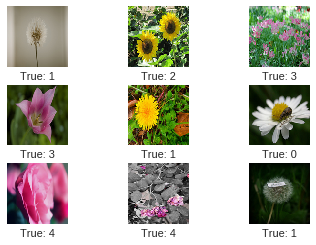

In [14]:
# Get the first images from the test-set.
images = [test_data[i][0] for i in range(9)]
# Get the true classes for those images.
cls_true = [test_data[i][1] for i in range(9)]
print([test_data[i][2] for i in range(9)])

# Plot the images and labels using our helper-function above.
plot_images(images=images, cls_true=cls_true)

In [0]:
def plot_example_errors(cls_pred):
    # cls_pred is an array of the predicted class-number for
    # all images in the test-set.

    # Boolean array whether the predicted class is incorrect.
    incorrect = (cls_pred != data.y_test_cls)

    # Get the images from the test-set that have been
    # incorrectly classified.
    images = data.x_test[incorrect]
    
    # Get the predicted classes for those images.
    cls_pred = cls_pred[incorrect]

    # Get the true classes for those images.
    cls_true = data.y_test_cls[incorrect]
    
    # Plot the first 9 images.
    plot_images(images=images[0:9],
                cls_true=cls_true[0:9],
                cls_pred=cls_pred[0:9])

In [0]:
# Start construction of the Keras Sequential model.
model = Sequential()

# Add an input layer which is similar to a feed_dict in TensorFlow.
# Note that the input-shape must be a tuple containing the image-size.
model.add(InputLayer(input_shape=(img_size_flat,)))

# The input is a flattened array with 3096 elements,
# but the convolutional layers expect images with shape (32, 32, 3)
model.add(Reshape(img_shape_full))

# First-1 convolutional layer with ReLU-activation and max-pooling.
model.add(Conv2D(kernel_size=5, strides=1, filters=16, padding='same',
                 activation='relu', name='layer_conv1'))

# First-2 convolutional layer with ReLU-activation and max-pooling.
model.add(Conv2D(kernel_size=5, strides=1, filters=32, padding='same',
                 activation='relu', name='layer_conv2'))
model.add(MaxPooling2D(pool_size=2, strides=2))

# Second-1 convolutional layer with ReLU-activation and max-pooling.
model.add(Conv2D(kernel_size=5, strides=1, filters=32, padding='same',
                 activation='relu', name='layer_conv3'))

# Second-2 convolutional layer with ReLU-activation and max-pooling.
model.add(Conv2D(kernel_size=5, strides=1, filters=64, padding='same',
                 activation='relu', name='layer_conv4'))
model.add(MaxPooling2D(pool_size=2, strides=2))

# Flatten the 4-rank output of the convolutional layers
# to 2-rank that can be input to a fully-connected / dense layer.
model.add(Flatten())

# First fully-connected / dense layer with ReLU-activation.
model.add(Dense(128, activation='relu', name = "dense_1"))

# Last fully-connected / dense layer with softmax-activation
# for use in classification.
model.add(Dense(num_classes, activation='softmax', name = "dense_2"))

In [0]:
from tensorflow.python.keras.optimizers import Adam

optimizer = Adam(lr=1e-3)

In [0]:
model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [30]:
model.fit(x=np.array([td[0]/255 for td in train_data]),
          y=np.array([td[2] for td in train_data]),
          epochs=3, batch_size=128, shuffle = True)

Epoch 1/3
2935/2935 [==============================] - 376s 128ms/step - loss: 1.2230 - acc: 0.4842
Epoch 2/3
2935/2935 [==============================] - 378s 129ms/step - loss: 1.0819 - acc: 0.5646
Epoch 3/3
2935/2935 [==============================] - 389s 133ms/step - loss: 1.0123 - acc: 0.5918


In [31]:
result = model.evaluate(x=np.array([td[0] for td in test_data]),
                        y=np.array([td[2] for td in test_data]))

492/492 [==============================] - 19s 38ms/step


In [32]:
for name, value in zip(model.metrics_names, result):
    print(name, value)
print("{0}: {1:.2%}".format(model.metrics_names[1], result[1]))

loss 7.983087845934116
acc 0.4959349598341841
acc: 49.59%


[[3.26808125e-01 4.23422337e-01 1.61229167e-02 6.85082972e-02
  1.65138289e-01]
 [1.07676387e-01 1.76902711e-01 6.69033229e-01 2.03844327e-02
  2.60032546e-02]
 [1.94754094e-01 1.07129894e-01 1.35459930e-01 4.23586518e-01
  1.39069602e-01]
 [1.29324332e-01 3.91314365e-02 2.35526450e-02 2.10720837e-01
  5.97270727e-01]
 [1.12490304e-01 4.94064003e-01 2.65370190e-01 9.35296640e-02
  3.45459133e-02]
 [8.46079886e-01 1.06200732e-01 1.14671821e-02 1.19841471e-02
  2.42680963e-02]
 [8.27916339e-03 4.49244726e-05 5.53391816e-04 6.41322553e-01
  3.49799931e-01]
 [3.59217525e-01 1.78004280e-01 9.46017355e-03 1.01722278e-01
  3.51595730e-01]
 [2.78323799e-01 4.23367381e-01 3.63077037e-02 1.14247233e-01
  1.47753879e-01]]


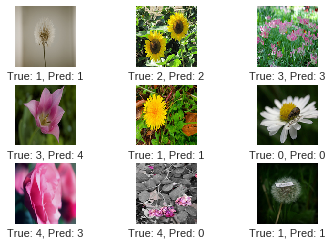

In [33]:
# Get the first images from the test-set.
images = np.array([test_data[i][0]/255 for i in range(9)])
# Get the true classes for those images.
cls_true = np.array([test_data[i][1] for i in range(9)])

y_pred = model.predict(x=images)
print(y_pred)
cls_pred = np.argmax(y_pred, axis=1)

plot_images(images=images,
            cls_true=cls_true,
            cls_pred=cls_pred)